# 仮想環境の構築


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [29]:
import matplotlib
import matplotlib.animation as anm
matplotlib.use("nbagg")

In [30]:
import math 
import matplotlib.patches as patches 

In [31]:
class VWorld:
    def __init__(self,debug = False):
        self.objects = []               # ロボットのオブジェクトを登録
        self.debug = debug
        
    def append(self,obj):
        self.objects.append(obj)        # オブジェクトを登録するためのメソッド
    
    def draw(self):
        fig = plt.figure(figsize=(8,8)) # 8x8 inch の図を準備非
        ax =fig.add_subplot(111)        #サブプロットを用意
        ax.set_aspect("equal")          #縦横比の座標の値を一致させる
        ax.set_xlim(-5,5)
        ax.set_ylim(-5,5)
        ax.set_xlabel("X",fontsize=20)
        ax.set_ylabel("Y",fontsize=20)
        
        elems =[]
        
        """
        ロボットを描写するためのものであれば、次のように実装
        for obj in self.objects:
            obj.draw(ax)
        """
        
        # デバッグ時にはアニメーションを実行しない
        
        if(self.debug):
            for i in range(100):self.one_step(i,elems,ax)
        else:
            self.ani = anm.FuncAnimation(fig,self.one_step,fargs =(elems,ax),frames =10, interval =1000, repeat =False)
            plt.show()
            
    def one_step(self,i,elems,ax):
        while elems:
            elems.pop().remove()
        elems.append(ax.text(-4,4,4,5,"t="+str(i),fontsize=10))

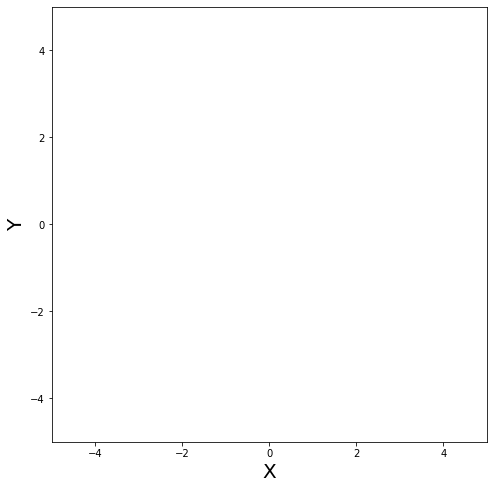

In [15]:
world = VWorld()
world.draw()

In [17]:
class VRobot:
    def __init__(self,pose,color = "black"):
        self.pose = pose
        self.r =0.2
        self.color = color
        
    def draw(self,ax): 
        x,y,theta = self.pose                    # 姿勢を３つに分解して３つの変数に
        xn = x+ self.r* math.cos(theta)　        # ロボットの X座標
        yn = y+ self.r* math.sin(theta)          # ロボットの Y座標
        
        ax.plot([x,xn],[y,yn],color =self.color) # ロボットの向きを示す線分の描写
        
        c = patches.Circle(xy=(x,y),radius =self.r, fill =False, color =self.color )
        ax.add_patch(c)

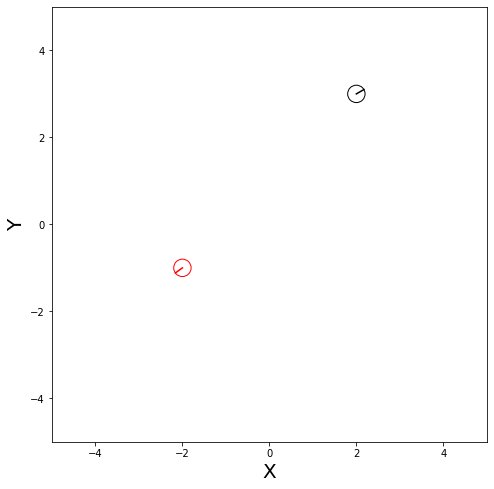

In [22]:
world = VWorld()

robot1 = VRobot(np.array([2,3,math.pi/6]).T) 
robot2 = VRobot(np.array([-2,-1,math.pi/5*6]).T,"red")

world.append(robot1)
world.append(robot2)

world.draw()